In [1]:
# Import libraries
from keras.applications import VGG16, InceptionV3, ResNet50
from keras.layers import Flatten, Dense
from keras.models import Model

In [2]:
# Define the path to the dataset
train_dir = r'C:\Users\Jin Zichao\Desktop\MV\Week 5\data_mv\train'
test_dir = r'C:\Users\Jin Zichao\Desktop\MV\Week 5\data_mv\test'

In [3]:
# Preprocess the data into train, test and validation split
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',  # Assuming labels are provided as integers
    color_mode='rgb'  # Assuming images are grayscale
)
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',
    color_mode='rgb'
)

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [4]:
# Building the CNN model
base_model = ResNet50(include_top = False, weights='imagenet', input_shape=(128, 128, 3))
x = Flatten()(base_model.output)
x = Dense(100, activation = 'relu')(x)
output_layer = Dense(3, activation = 'softmax')(x)

In [5]:
# Freeze base layers to prevent their weights from being updated
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Create the new model
model = Model(inputs=base_model.input, outputs=output_layer)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [8]:
# Complile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [10]:
# Train the model using model fitting
history=model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1/1 [==============================] - 7s 7s/step - loss: 1.1457 - accuracy: 0.0000e+00 - val_loss: 5.5579 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 103ms/step - loss: 2.5200 - accuracy: 0.3333 - val_loss: 2.1360 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 107ms/step - loss: 1.1989 - accuracy: 0.3333 - val_loss: 0.4114 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 110ms/step - loss: 1.1175 - accuracy: 0.6667 - val_loss: 0.2028 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 105ms/step - loss: 1.1485 - accuracy: 0.3333 - val_loss: 0.2570 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 102ms/step - loss: 0.9131 - accuracy: 0.3333 - val_loss: 0.5748 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 109ms/step - loss: 0.6421 - accuracy: 0.6667 - val_loss: 1.2257 - val_accuracy: 0.0000e+00
Epoch 8

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

1/1 [==============================] - 2s 2s/step - loss: 0.8630 - accuracy: 0.2500
0.8629792332649231
0.25


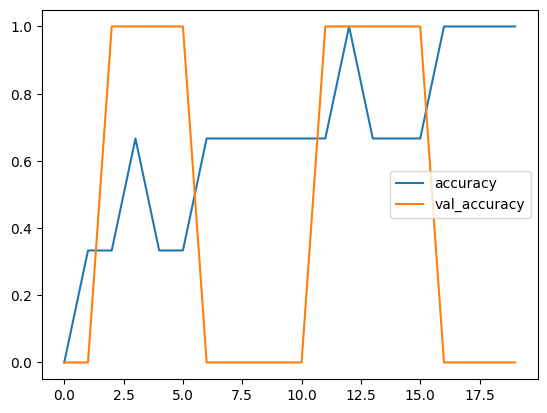

In [12]:
# Visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

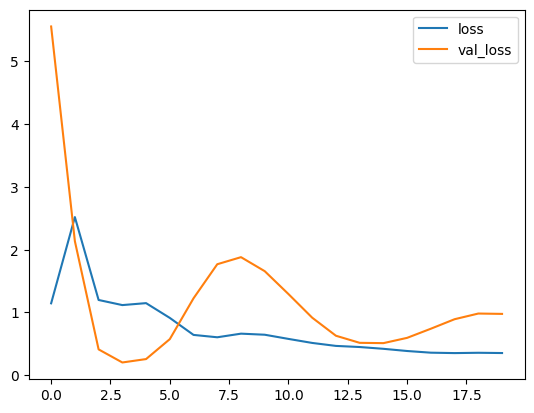

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()